In [149]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, svm
from sklearn.linear_model import LinearRegression
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from scipy import stats

ModuleNotFoundError: No module named 'regressors'

In [39]:
df = pd.read_csv("PeakCharCSV4.csv")
df

,Name,RatioBD,RatioBA,MeanHourlyEnergyBefore,MeanHourlyEnergyDuring,MeanHourlyEnergyAfter,KshapeB_C0,KshapeB_C1,KshapeB_C2,KshapeD_C0,...,KshapeA_Mode,KmeanPeak_Mode,GMMPeak_Mode,Game1Rank,Game2Rank,Game3Rank,Game4Rank,Game5Rank,Game6Rank,SumGameRank
0,KenHourlyEnergy,-0.33,0.10,9.37,12.48,8.40,0.63,0.00,0.11,0.7,...,0,0,2,3,0,0,0,5,0,2
1,SivaraamHourlyEnergy,0.58,0.57,12.66,5.32,5.43,0.75,0.00,0.00,0.7,...,0,0,2,0,0,0,0,0,0,0
2,SnehaHourlyEnergy,0.13,0.62,15.82,13.71,5.96,0.75,0.00,0.11,0.5,...,1,0,2,0,0,1,2,0,4,3
3,ChristopherHourlyEnergy,0.15,0.37,32.27,27.48,20.49,1.00,0.00,0.00,0.8,...,1,1,1,0,0,0,0,0,0,0
4,GiriHourlyEnergy,0.35,-0.51,5.91,3.87,8.90,0.75,0.13,0.33,0.6,...,1,0,2,0,0,5,1,0,0,2
5,AjeetHourlyEnergy,-0.24,-0.18,3.13,3.88,3.69,0.25,0.00,0.00,0.5,...,0,0,0,0,0,0,0,0,0,0
6,ChayleHourlyEnergy,-0.06,-0.23,35.84,37.90,44.03,0.88,0.00,0.00,0.6,...,1,2,0,0,3,3,0,0,0,2
7,RamitHourlyEnergy,0.36,0.51,16.56,10.62,8.15,1.00,0.00,0.11,0.7,...,1,0,2,0,0,0,0,1,5,2
8,PrakharHourlyEnergy,0.14,-0.08,48.41,41.71,52.32,0.38,0.38,0.22,0.6,...,0,0,1,0,0,0,0,0,0,0
9,KomangHourlyEnergy,0.58,0.20,4.63,1.96,3.70,1.00,0.00,0.00,0.7,...,1,0,0,0,0,2,0,2,3,3


In [40]:
def run_linear_regression(clustering_results, y_variables):
    lg = LinearRegression()
    model = lg.fit(clustering_results, y_variables)
    r_sq = model.score(clustering_results, y_variables)
    cv_score = cross_validate(model, clustering_results, y_variables, cv=5, scoring='r2', return_train_score=True)
    scores = cross_val_score(model, clustering_results, y_variables, cv=5)
    coeff = model.coef_
    intercept = model.intercept_
    return model, r_sq, cv_score, coeff, intercept, scores

In [41]:
def run_SVM(clustering_results, y_variables):
    s = svm.SVR(kernel='poly', gamma='scale')
    model = s.fit(clustering_results, y_variables)
    r_sq = model.score(clustering_results, y_variables)
    cv_score = cross_validate(model, clustering_results, y_variables, cv=5, scoring='r2', return_train_score=True)
    return model, r_sq, cv_score

In [42]:
def run_CART(clustering_results, y_variables):
    clf = tree.DecisionTreeRegressor(min_samples_leaf=5)
    model = clf.fit(clustering_results, y_variables)
    r_sq = model.score(clustering_results, y_variables)
    cv_score = cross_validate(model, clustering_results, y_variables, cv=5, scoring='r2', return_train_score=True)
    return model, r_sq, cv_score

In [148]:
_, performance, cv_score, coeff, intercept, scores = run_linear_regression(df[['KmeanB_C0', 'KmeanB_C1']], df['MeanHourlyEnergyAfter'])  
print("Model R2:", performance),
print("Cross validated R2:", cv_score['train_score'].mean()),
print("Coefficients:", coeff),
print("Intercept:", intercept)
print("cross val:", scores)

Model R2: 0.6654507178183012
Cross validated R2: 0.6670545809667943
Coefficients: [-40.49645507 -35.69198577]
Intercept: 37.041734031672895
cross val: [-1.03778528  0.7071734  -4.86836415  0.74704557  0.63989655]


In [156]:
mod = sm.OLS(df['MeanHourlyEnergyAfter'],df[['KmeanB_C0', 'KmeanB_C1']])
fii = mod.fit()
print(fii.summary())

                                  OLS Regression Results                                  
Dep. Variable:     MeanHourlyEnergyAfter   R-squared (uncentered):                   0.067
Model:                               OLS   Adj. R-squared (uncentered):             -0.021
Method:                    Least Squares   F-statistic:                             0.7597
Date:                   Wed, 18 Dec 2019   Prob (F-statistic):                       0.480
Time:                           18:56:38   Log-Likelihood:                         -103.54
No. Observations:                     23   AIC:                                      211.1
Df Residuals:                         21   BIC:                                      213.4
Df Model:                              2                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [131]:
_, performance, cv_score = run_SVM(df[['KmeanB_C0', 'KmeanB_C1']], df['RatioBA'])
performance, cv_score, print("SVM CV performance:", cv_score['train_score'].mean())

SVM CV performance: 0.07185912757969473


(-0.017922036438472455,
 {'fit_time': array([0.00558114, 0.0026052 , 0.00232506, 0.00194192, 0.00720024]),
  'score_time': array([0.00191092, 0.00115299, 0.00218892, 0.00156903, 0.00188875]),
  'test_score': array([ -1.06941337,  -2.51251497, -11.14069522,  -0.95041485,
          -3.21235038]),
  'train_score': array([ 0.06254946,  0.0524026 ,  0.16406937,  0.13210767, -0.05183347])},
 None)

Model R2: 0.7549827051288528
CART CV R2: 0.617286972068403


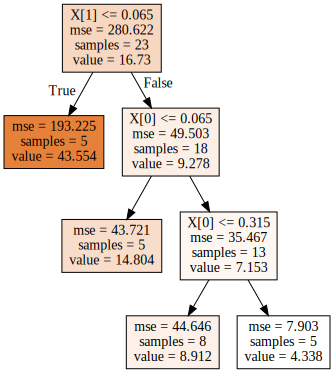

In [135]:
_, performance, cv_score = run_CART(df[['KmeanB_C0', 'KmeanB_C1']], df['MeanHourlyEnergyDuring'])
print("Model R2:", performance)
print("CART CV R2:", cv_score['train_score'].mean())
graph = Source(tree.export_graphviz(_, out_file=None, filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
# 'KshapeB_C0', 'KshapeB_C1'
# 'KmeanB_C0', 'KmeanB_C1'
# 'GMMPeak_C0', 'GMMPeak_C1'
# 'NGMMPeak_C0', 'NGMMPeak_C1'
# 'KmeanPeak_C0', 'KmeanPeak_C1'
# 'NKmeanPeak_C0', 'NKmeanPeak_C1'